In [ ]:
!pwd

/content


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization, Flatten
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imshow
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Folder/

/content/gdrive/MyDrive/Folder


In [41]:
X = np.load('/content/gdrive/MyDrive/Folder/images28_28.npy')
y = np.load('/content/gdrive/MyDrive/Folder/labels28_28.npy')

In [47]:
tain_size=0.7
valid_size = 0.1
test_size = 0.2
valid_test_split = valid_size / test_size

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=1-tain_size, shuffle=True, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=valid_test_split, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(7010, 64, 64, 3) (7010, 7)
(1503, 64, 64, 3) (1503, 7)
(1502, 64, 64, 3) (1502, 7)


In [65]:
def get_callbacks():
  return [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)      
  ]
histories = {}

In [87]:
linear_model = tf.keras.Sequential([                                                                   
   keras.layers.Dense(7, activation = 'linear')                                 
])
linear_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
linear_hist=linear_model.fit(train_data, train_label, epochs=20, validation_data=(validation_data, validation_label),callbacks=get_callbacks(), verbose=0)
linear_hist

In [88]:
histories['linear'] = linear_hist

(0.0, 1.0)

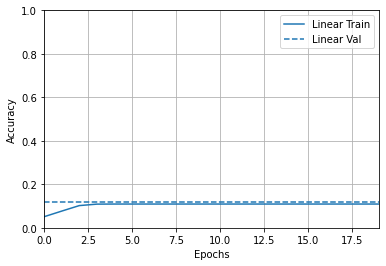

In [89]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)
plt.ylim([0, 1])

In [96]:
def get_callbacks():
  return [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)      
  ]
histories = {}

In [91]:
linear_model = tf.keras.Sequential([                                                                   
   keras.layers.Dense(7, activation = 'Relu')                                 
])
linear_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
linear_hist=linear_model.fit(train_data, train_label, epochs=20, validation_data=(validation_data, validation_label),callbacks=get_callbacks(), verbose=0)
linear_hist

(0.0, 1.0)

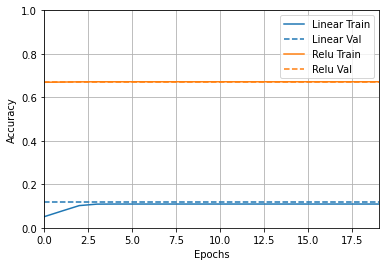

In [93]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)
plt.ylim([0, 1])

In [97]:
def get_callbacks():
  return [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=200)      
  ]
log_hist = {}

In [98]:
logistic_model = tf.keras.Sequential([                                                               
   keras.layers.Dense(7, activation = 'sigmoid')                                 
])
logistic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
log=logistic_model.fit(train_data, train_label, epochs=40, validation_data=(validation_data, validation_label),callbacks=get_callbacks(), verbose=0)

In [99]:
log_hist['relu'] = log

(0.0, 1.0)

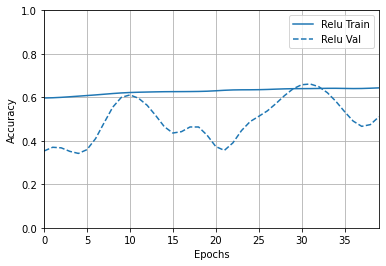

In [100]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(log_hist)
plt.ylim([0, 1])

In [101]:
df = pd.read_csv('/content/gdrive/MyDrive/Folder/data/hmnist_28_28_RGB.csv')
print(df['label'].value_counts())

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64


In [103]:
tain_size=0.7
valid_size = 0.1
test_size = 0.2
valid_test_split = valid_size / test_size

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=1-tain_size, shuffle=True, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=valid_test_split, shuffle=True, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(7010, 64, 64, 3) (7010, 7)
(1503, 64, 64, 3) (1503, 7)
(1502, 64, 64, 3) (1502, 7)


In [109]:
cnn_model = tf.keras.Sequential([                                                               
   keras.layers.Conv2D(28, (3, 3), activation = 'relu', input_shape=(64, 64, 3)),
   keras.layers.MaxPooling2D(2, 2),
   keras.layers.Conv2D(56, (3, 3), activation = 'relu'),
   keras.layers.MaxPooling2D(2, 2),
   keras.layers.Conv2D(56, (3, 3), activation = 'relu'),
   keras.layers.Flatten(),
   keras.layers.Dense(56, activation='relu'),
   keras.layers.Dense(7, activation='softmax')                                 
])
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [110]:
cnn_hist = cnn_model.fit(X_train, y_train, epochs=40, validation_data=(X_val, y_val), callbacks=get_callbacks(), verbose=0)

In [111]:
histories['cnn'] = cnn_hist

(0.0, 1.0)

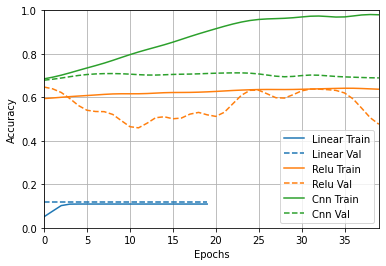

In [112]:
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)
plotter.plot(histories)
plt.ylim([0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

tain_size=0.7
valid_size = 0.1
test_size = 0.2
valid_test_split = valid_size / test_size

train_df, valid_test_df = train_test_split(df, train_size=tain_size, shuffle=True, random_state=42)
valid_df, test_df = train_test_split(valid_test_df, train_size=valid_test_split, shuffle=True, random_state=42)

print(' train_df length: ', len(train_df), '  test_df length: ', len(test_df), '  valid_df length: ', len(valid_df))
print (train_df['label'].value_counts())

 train_df length:  7010   test_df length:  1503   valid_df length:  1502
4    4708
6     766
2     749
1     371
0     231
5     109
3      76
Name: label, dtype: int64


In [ ]:
train_data = train_df.iloc[:, :-1]
train_label = pd.get_dummies(train_df['label'])
validation_data = valid_df.iloc[:, :-1]
validation_label = pd.get_dummies(valid_df['label'])

In [ ]:
linear_model = tf.keras.Sequential([                                                                   
   keras.layers.Dense(7, activation = 'ReLU')                                 
])
linear_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=linear_model.fit(train_data, train_label, epochs=20, validation_data=(validation_data, validation_label))

Epoch 1/20
220/220 [==============================] - 3s 9ms/step - loss: 4.2986 - accuracy: 0.0528 - val_loss: 4.1720 - val_accuracy: 0.0479
Epoch 2/20
220/220 [==============================] - 1s 6ms/step - loss: 4.1476 - accuracy: 0.0529 - val_loss: 4.1720 - val_accuracy: 0.0479
Epoch 3/20
220/220 [==============================] - 1s 5ms/step - loss: 4.1476 - accuracy: 0.0529 - val_loss: 4.1720 - val_accuracy: 0.0479
Epoch 4/20
220/220 [==============================] - 1s 6ms/step - loss: 4.1476 - accuracy: 0.0529 - val_loss: 4.1720 - val_accuracy: 0.0479
Epoch 5/20
220/220 [==============================] - 1s 6ms/step - loss: 4.1476 - accuracy: 0.0529 - val_loss: 4.1720 - val_accuracy: 0.0479
Epoch 6/20
220/220 [==============================] - 1s 6ms/step - loss: 4.1476 - accuracy: 0.0529 - val_loss: 4.1720 - val_accuracy: 0.0479
Epoch 7/20
220/220 [==============================] - 1s 6ms/step - loss: 4.1476 - accuracy: 0.0529 - val_loss: 4.1720 - val_accuracy: 0.0479
Epoch 

In [ ]:
logistic_model = tf.keras.Sequential([                                                               
   keras.layers.Dense(7, activation = 'sigmoid')                                 
])
logistic_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
log=logistic_model.fit(train_data, train_label, epochs=40, validation_data=(validation_data, validation_label))

Epoch 1/40
220/220 [==============================] - 1s 4ms/step - loss: 10.6427 - accuracy: 0.5812 - val_loss: 23.8239 - val_accuracy: 0.0373
Epoch 2/40
220/220 [==============================] - 1s 4ms/step - loss: 8.0970 - accuracy: 0.5961 - val_loss: 12.2540 - val_accuracy: 0.6025
Epoch 3/40
220/220 [==============================] - 2s 7ms/step - loss: 8.4221 - accuracy: 0.5910 - val_loss: 6.0554 - val_accuracy: 0.6298
Epoch 4/40
220/220 [==============================] - 1s 7ms/step - loss: 7.5911 - accuracy: 0.6033 - val_loss: 4.7637 - val_accuracy: 0.6691
Epoch 5/40
220/220 [==============================] - 1s 6ms/step - loss: 7.9716 - accuracy: 0.6031 - val_loss: 6.6773 - val_accuracy: 0.6731
Epoch 6/40
220/220 [==============================] - 1s 5ms/step - loss: 6.6324 - accuracy: 0.6140 - val_loss: 16.6722 - val_accuracy: 0.1818
Epoch 7/40
220/220 [==============================] - 1s 4ms/step - loss: 6.9333 - accuracy: 0.6160 - val_loss: 15.7381 - val_accuracy: 0.6152
E